In [46]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
#sns.set_palette('husl')
sns.set_theme()

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Predicting a Biological Response

Predict a biological response of molecules from their chemical properties  
https://www.kaggle.com/c/bioresponse/data

Каждая строка в этом наборе данных представляет молекулу. Первый столбец содержит экспериментальные данные, описывающие реальную биологическую реакцию; было обнаружено, что молекула вызывает эту реакцию (1) или нет (0). Остальные столбцы представляют молекулярные дескрипторы (от d1 до d1776), это рассчитанные свойства, которые могут отражать некоторые характеристики молекулы, например, размер, форму или элементный состав. Матрица дескрипторов была нормализована.

Activity : target 0 / 1  
D1-D1776 : featuteres - нормализованные

In [47]:
#берём набор данных, который получился в лабораторной 1
dataset = pd.read_csv('../data/20_bioresponse_lab1.csv')

## Анализ данных

In [48]:
# размер датасета, 3434 записей, 11 столбцов

dataset.shape

(3434, 11)

In [49]:
# отображаем первые 10 сстрок датасета

dataset.head(10)

,Activity,D1,D2,D3,D4,D5,D8,D10,D11,D12,D13
0,0,0.100000,0.517794,0.00,0.00,0.494734,0.303809,0.125177,0.532258,0.0000,0.0000
1,0,0.133333,0.771035,0.20,0.25,0.122153,0.611112,0.330917,0.133065,0.0000,0.0000
2,0,0.100000,0.768150,0.10,0.25,0.262299,0.394514,0.343472,0.000000,0.0000,0.0000
3,0,0.166667,0.563907,0.00,0.25,0.254419,0.444385,0.135480,0.555400,0.0000,0.0323
4,0,0.033300,0.675038,0.10,0.00,0.235896,0.561463,0.255593,0.163772,0.0625,0.0000
5,0,0.100000,0.686625,0.25,0.00,0.104709,0.585445,0.364589,0.220245,0.1875,0.0000
6,0,0.100000,0.665270,0.10,0.25,0.251867,0.469871,0.181089,0.295699,0.0625,0.0000
7,0,0.066700,0.475563,0.00,0.25,0.401865,0.131076,0.126869,0.876660,0.1250,0.0000
8,0,0.000000,0.375649,0.00,0.00,0.242260,0.077900,0.147711,0.106452,0.1250,0.0000
9,0,0.166667,0.722598,0.15,0.00,0.194978,0.388972,0.193930,0.212903,0.1875,0.0968


In [50]:
import mpl_toolkits.mplot3d  # noqa: F401


from sklearn import datasets
from sklearn.cluster import KMeans

In [51]:
# Метод Pandas info()  выводит очень много информации о наборе данных - количество записей,
# количество ненулевых значений в каждом столбце, тип данных в столбце

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3434 entries, 0 to 3433
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Activity  3434 non-null   int64  
 1   D1        3434 non-null   float64
 2   D2        3434 non-null   float64
 3   D3        3434 non-null   float64
 4   D4        3434 non-null   float64
 5   D5        3434 non-null   float64
 6   D8        3434 non-null   float64
 7   D10       3434 non-null   float64
 8   D11       3434 non-null   float64
 9   D12       3434 non-null   float64
 10  D13       3434 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 295.2 KB


In [52]:
# Pandas describe() используется для просмотра  основной статистической информации, таких как процентиль, среднее,
# стандартное отклонение и т.д. фрейма данных или ряда числовых значений:

dataset.describe()

,Activity,D1,D2,D3,D4,D5,D8,D10,D11,D12,D13
count,3434.000000,3434.000000,3434.000000,3434.000000,3434.000000,3434.000000,3434.000000,3434.000000,3434.000000,3434.000000,3434.000000
mean,0.500000,0.076790,0.590758,0.067079,0.039386,0.213154,0.452530,0.268481,0.174033,0.078899,0.017297
std,0.500073,0.079728,0.105908,0.078251,0.117610,0.102714,0.164527,0.096891,0.179807,0.086361,0.059000
min,0.000000,0.000000,0.282128,0.000000,0.000000,0.002630,0.000000,0.003040,0.000000,0.000000,0.000000
25%,0.000000,0.033300,0.516704,0.000000,0.000000,0.138907,0.375619,0.192313,0.040900,0.000000,0.000000
50%,0.500000,0.066700,0.584931,0.050000,0.000000,0.191739,0.498465,0.281313,0.133065,0.062500,0.000000
75%,1.000000,0.100000,0.664995,0.100000,0.000000,0.262299,0.568728,0.342497,0.241935,0.125000,0.000000
max,1.000000,1.000000,0.964381,0.950000,1.000000,1.000000,0.989870,1.000000,1.000000,1.000000,1.000000


In [53]:
# бинарная классификация
dataset['Activity'].unique()

array([0, 1])

In [54]:
# Теперь проверим количество строк, которое принадлежит каждому классу:
# в лабораторной 1 сделали классы одинаковыми по количеству объектов

dataset['Activity'].value_counts()

Activity
0    1717
1    1717
Name: count, dtype: int64

In [55]:
# подмножество признаков, которое взяли из оригинального набора данных
dataset.columns

Index(['Activity', 'D1', 'D2', 'D3', 'D4', 'D5', 'D8', 'D10', 'D11', 'D12',
       'D13'],
      dtype='object')

# Визуализация данных

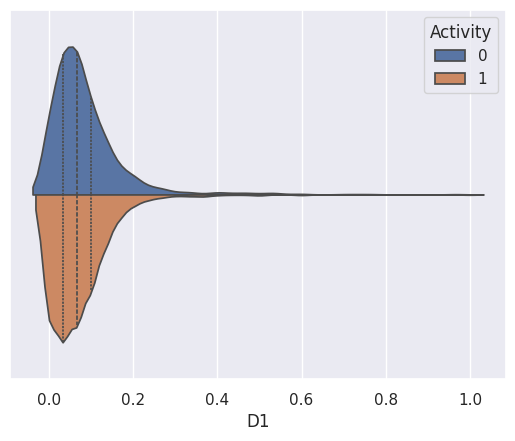

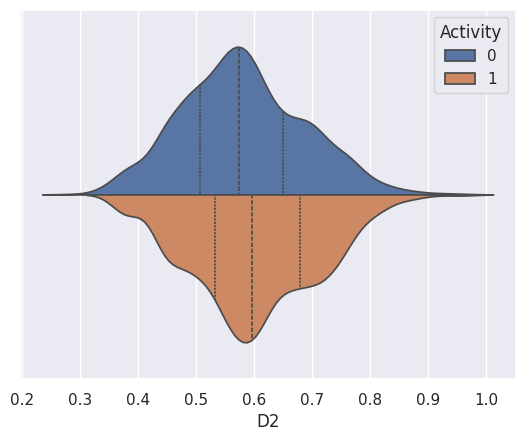

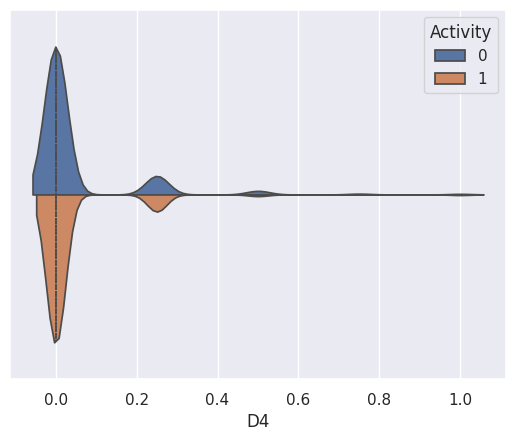

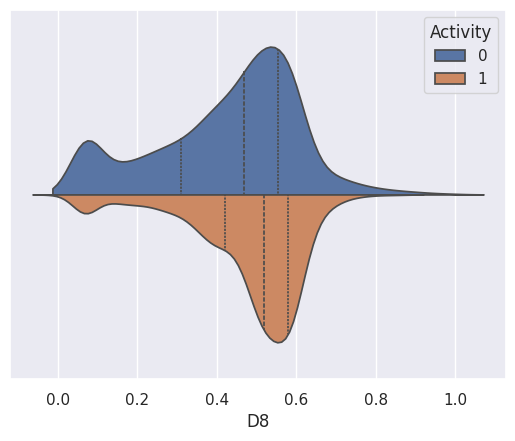

In [56]:
# Скрипичный график.
# Используется для проверки сравнения распределения переменных:

sns.violinplot(hue='Activity', split=True, x='D1', data=dataset, inner='quartile')
plt.show()

sns.violinplot(hue='Activity', split=True, x='D2', data=dataset, inner='quartile')
plt.show()

sns.violinplot(hue='Activity', split=True, x='D4', data=dataset, inner='quartile')
plt.show()

sns.violinplot(hue='Activity', split=True, x='D8', data=dataset, inner='quartile')
plt.show()


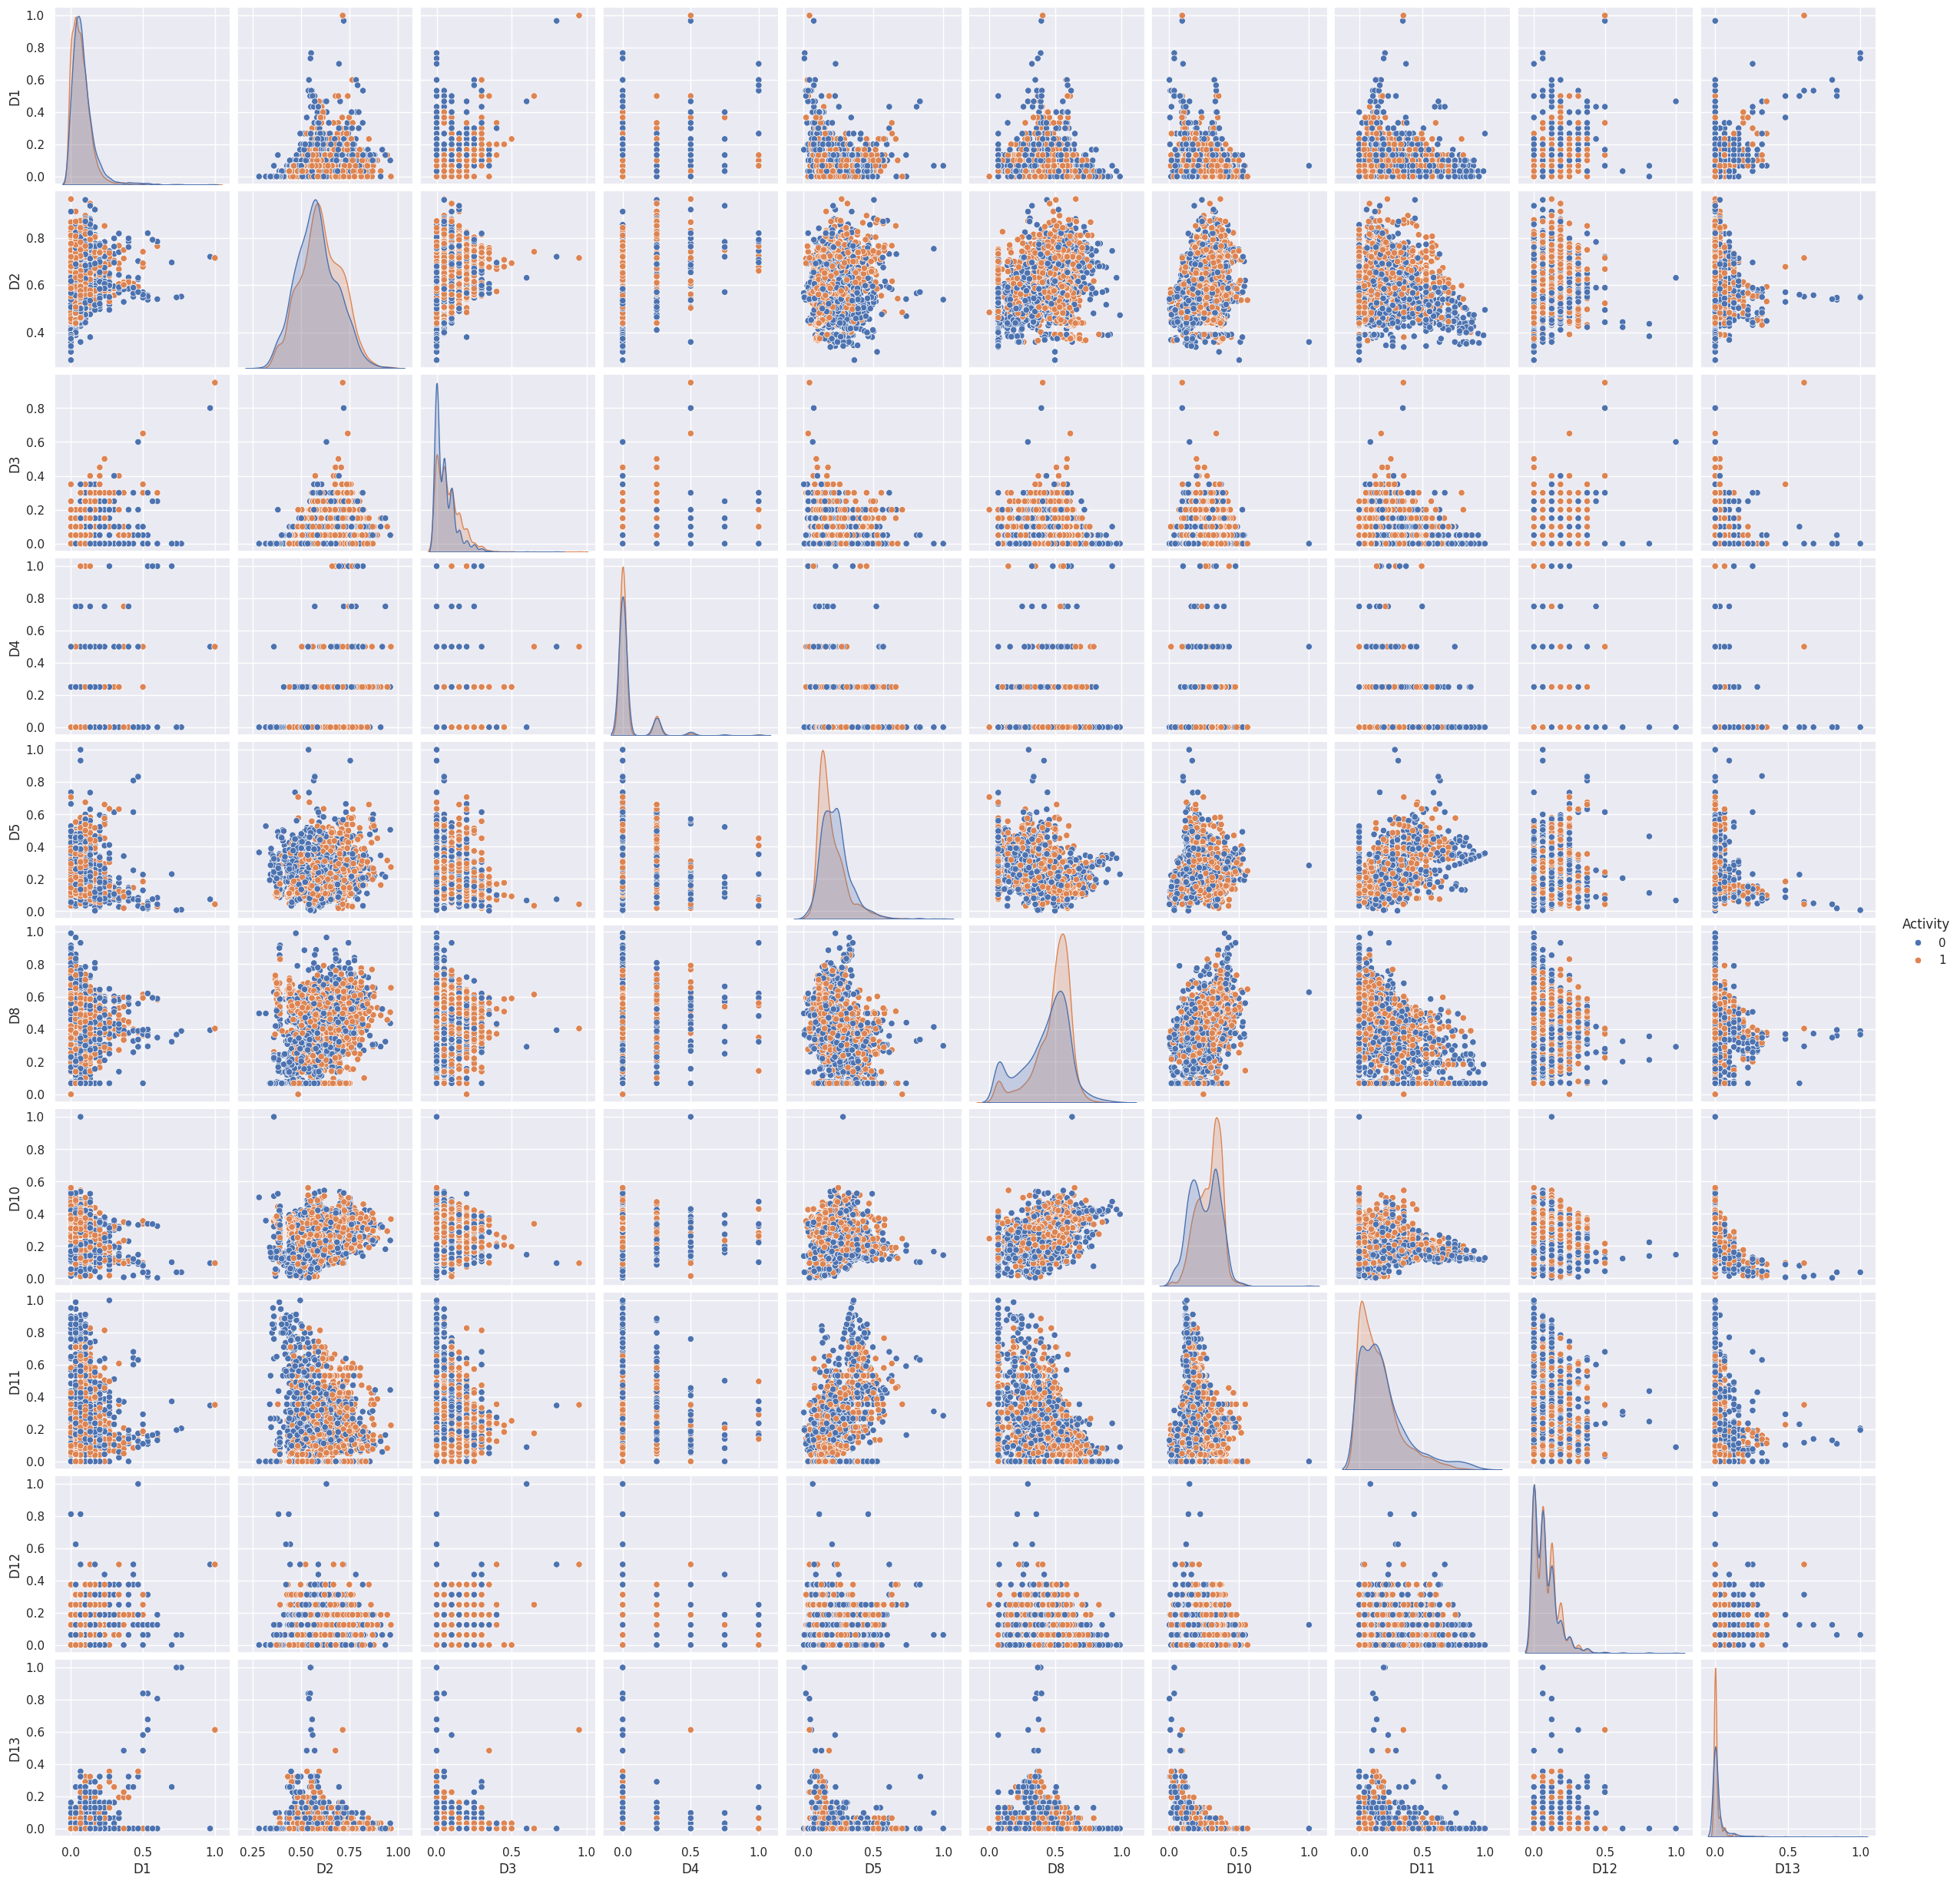

In [58]:
# Парный график
#Построение нескольких попарных двумерных распределений в наборе данных с помощью pairplot:
sns.pairplot(dataset, hue='Activity')
plt.show()


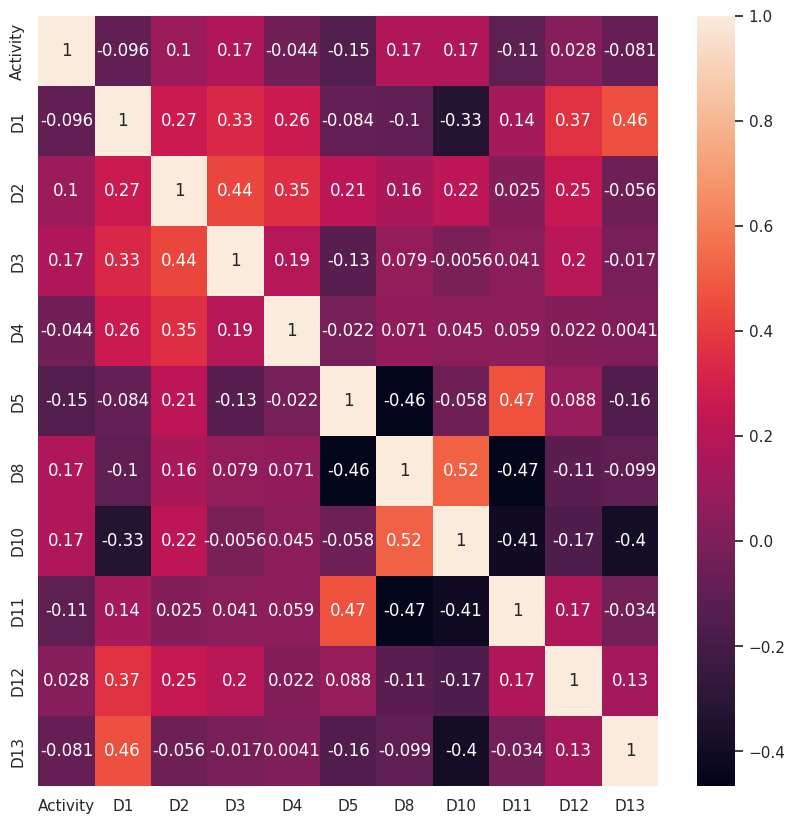

In [61]:
# Тепловая карта
# Построение тепловой карты для проверки корреляции.
# dataset.corr() используется для поиска попарной корреляции всех столбцов в кадре данных.

plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(numeric_only = True), annot=True)
plt.show()

Очень подробное и понятное описание возможностей построения графиков с помощью Matplotlib и Pandas с примерами кода можно найти здесь:

https://colab.research.google.com/drive/1ggUqm3C-Jk3dcMeibMW88FZLu7vtJ2k8?usp=sharing


# Построение модели

## Разделение набора данных

Y  - целевая переменная, которую предсказываем. Мы ищем зависимость этой переменной от соответствующих фич.  В нашем случае это столбец Activity.

В X складываем весь набор данных без целевой переменной.


In [62]:
X = dataset.drop(['Activity'], axis=1)
y = dataset['Activity']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (3434, 10) | y shape: (3434,) 


## Train Test разделение

Разделяем наш набор данных на обучающий (train) и тестовый (test) с помощью train_test_split(), мы берем 80% данных для обучения нашей модели и 20% оставляем в качестве проверочного набора данных:

startify :  
Some classification problems do not have a balanced number of examples for each class label. As such, it is desirable to split the dataset into train and test sets in a way that preserves the same proportions of examples in each class as observed in the original dataset. This is called a stratified train-test split



In [65]:
# shuffle = True default
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10, stratify=y)

In [66]:
import scipy.stats as stats
stats.ttest_ind (a=y_train, b=y_test)

TtestResult(statistic=np.float64(-0.04264479749219399), pvalue=np.float64(0.9659871654331559), df=np.float64(3432.0))

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, test_size=0.20, random_state=15, stratify=y_mapped)

stats.ttest_ind (a=y_train, b=y_test)

TtestResult(statistic=0.0, pvalue=1.0, df=148.0)

## Обучение и выбор оптимальной модели

Далее попробуем следующие алгоритмы:

Logistic Regression (LR) </br>
Linear Discriminant Analysis (LDA)</br>
K-Nearest Neighbors (KNN)</br>
Classification and Regression Trees (CART)</br>
Gaussian Naive Bayes (NB)</br>
Support Vector Machines (SVM)</br>
[Справочная информация по классификаторам](https://colab.research.google.com/drive/12aLAEAtM5a3dWh-6UYj18ONeCuH_lGJ3?usp=sharing)

In [68]:
# создаем лист для тех моделей, которые будем изучать
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

# оцениваем их метрики
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  # print(cv_results)
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.614134 (0.034136)
LDA: 0.612321 (0.027478)
KNN: 0.704770 (0.021494)
CART: 0.635959 (0.019922)
NB: 0.586074 (0.034177)
SVC: 0.599908 (0.036059)


KNN, Дерево решений и Логистическая регресия показали лучшие метрики среди всех алгоритмов.
Далее работаем с KNN (accuracy = 0.70).

Давайте обучим модель KNN на нашем обучающем наборе и сделаем прогноз на тестовом наборе на следующем шаге.

## Обучение конкретной модели
Определяем нашу модель KNN
После этого подгоняем/обучаем модель на X_train и Y_train с помощью метода .fit().
Затем мы делаем прогноз на X_test с помощью метода .predict().

In [89]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

model = KNeighborsClassifier()
model.fit(X_train, y_train)
predict_test = model.predict(X_test)
# LDA
# transform_x_train = model.transform(X_train)
model_accuracy = accuracy_score(y_test, predict_test)
model_recall = recall_score(y_test, predict_test, average="weighted")
model_precision = precision_score(y_test, predict_test, average="weighted")

print(f'sk KNN accuracy: {round(model_accuracy,4)}')
#print(f'sk KNN prediction on test: {predict_test}')
#print('sk LDA transformed features', transform_x_train[:5].T, sep='\n')

print("Recall (all 1s predicted right):", round(model_recall,4))
print("Precision (confidence when predicting a 1):", round(model_precision,4))
print("Detail:")
print(classification_report(y_test, predict_test, target_names=[str(i) for i in np.unique(y_test)]))

sk KNN accuracy: 0.7089
Recall (all 1s predicted right): 0.7089
Precision (confidence when predicting a 1): 0.7089
Detail:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71       343
           1       0.71      0.71      0.71       344

    accuracy                           0.71       687
   macro avg       0.71      0.71      0.71       687
weighted avg       0.71      0.71      0.71       687



## Визуализация решения

слабо отражает полученную модель  
модель строили по 10 признакам, а теперь пытаемся построить на двух  
понятно модель будет низкого качества

sk KNN accuracy: 0.5522388059701493


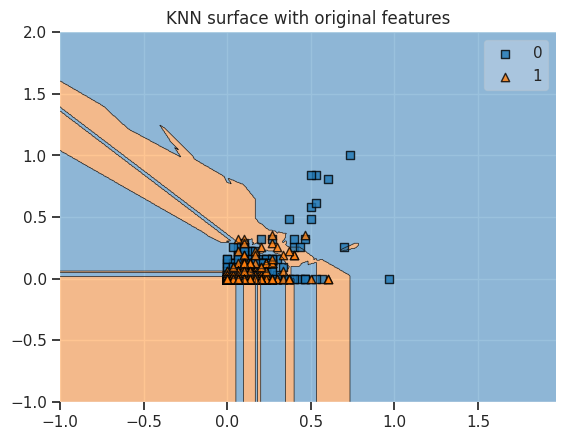

In [84]:
from mlxtend.plotting import plot_decision_regions

# Создадим целевой вектор y_2d
# Преобразуем классы к классам 0, 1, 2 соответственно
#y_s = y_train.map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
y_s = y_train
X_2d= X_train[['D1','D13']].values

y_2d = y_s.values


model2 = KNeighborsClassifier()
model2.fit(X_2d, y_2d)

plt.title('KNN surface with original features')
plot_decision_regions(
    	X=X_2d,
    	y=y_2d,
    	clf=model2)

predict2_test = model2.predict(X_2d)
model2_accuracy = accuracy_score(y_2d, predict2_test)

print(f'sk KNN accuracy: {model2_accuracy}')